In [1]:
from IPython.display import Image
from qiskit import *
from qiskit_ibm_runtime import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import *
from qiskit_aer import *

# Cargar credenciales de IBM Quantum
service = QiskitRuntimeService()

### Preparación de un qubit en una superposición de estados 

Definimos el cúbit como un sistema con dos estados de energía base, uno de los cuales es el estado base (0) y el otro es el estado excitado (1), como se ilustra en la Figura. El nombre del valor de estado de cada estado base podría ser cualquiera que elijamos, pero dado que los resultados de nuestro circuito serán interpretados por un sistema clásico, utilizaremos valores binarios para definir nuestros estados, en este caso, los valores binarios 0 y 1. Decir que la superposición de dos estados "está en 0 y 1 al mismo tiempo" es incorrecto. La forma correcta de describir un cúbit en un estado de superposición es decir que está "en una combinación lineal compleja de estados, donde en este caso, los estados son 0 y 1".

![bloch_01.png](Class_01/Figures/bloch_01.png)


La siguiente captura de pantalla se refiere a una **esfera de Bloch**, que representa un cúbit único y sus dos estados base, que están ubicados en polos opuestos. En el polo norte, tenemos el estado base 0, mientras que en el polo sur, tenemos el estado base 1. Los símbolos que rodean los valores de los estados base son las notaciones comúnmente utilizadas en la mayoría de los textos sobre computación cuántica. Esto se llama **notación de Dirac**, que fue nombrada en honor al físico teórico inglés Paul Dirac, quien concibió esta notación, a la que llamó notación **Bra-Ket**. Tanto la notación Bra-Ket como la notación de Dirac se utilizan de manera intercambiable, ya que se refieren al mismo concepto, como veremos más adelante.

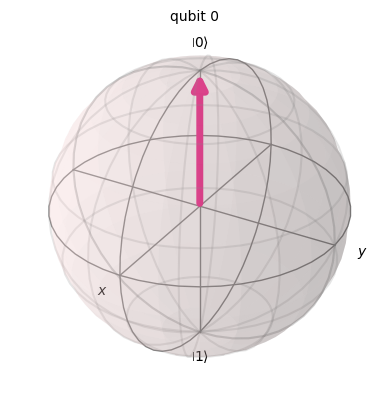

In [2]:
qc = QuantumCircuit(1)

state = Statevector(qc)
plot_bloch_multivector(state)

### Explicación de los vectores y los simuladores de estado vectorial

Entonces, podrías estar preguntándote de qué se trata todo esto de los vectores y los simuladores de estado vectorial. ¡Bien! Esto es lo que discutiremos ahora. La razón por la que quería ejecutar el experimento primero, en lugar de explicar qué son los estados vectoriales y qué hace el simulador de estado vectorial, es para que puedas verlo primero y luego, con suerte, la descripción sea un poco más clara. Comencemos con la explicación del vector.

Cada cúbit, como se mencionó anteriormente, está compuesto por dos estados base, que en este ejemplo residen en polos opuestos de la esfera de Bloch. Estos dos estados base son los que enviaríamos de regreso al sistema clásico como nuestro resultado: uno u otro. El vector que representa estos dos puntos se origina desde el origen de la esfera de Bloch, como puedes ver en el diagrama anterior o en el resultado de tu experimento. Si anotamos esto como un vector, escribiríamos lo siguiente:

$$
|0\rangle =
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

Dado que el opuesto se aplicaría al polo opuesto, lo anotaríamos de la siguiente manera:

$$
|1\rangle =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$


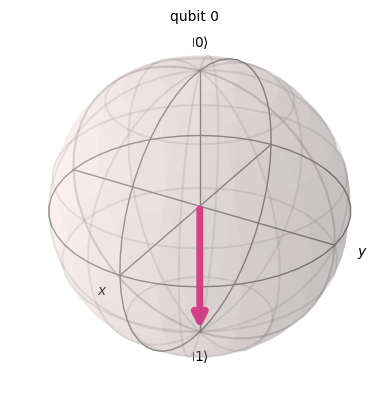

In [3]:
qc.x(0)
state = Statevector(qc)
plot_bloch_multivector(state)

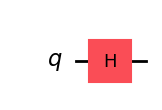

In [4]:
# Reiniciemos el circuito 
qc = QuantumCircuit(1)
# Vamos a configurar el qubit en un estado de superposición
qc.h(0)
# Dibujemos el circuito
qc.draw(output='mpl')

La compuerta **Hadamard** es una compuerta operacional que deja el qubit en un estado de superposición, lo que significa que cuando se mide el qubit, obtendremos la misma probabilidad de medir un 0 o un 1. En otras palabras, el estado del sistema colapsará a una de las bases del estado $| 0\rangle$ o $|1 \rangle$.

Matemáticamente, el estado de superposición se respresenta mediante:

$$
|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}
$$

$$
|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$

Esto es equivalente a una rotación  a $\pi/2$ al rededor de los ejes $X$ y $Z$ de la esfera de Bloch. Si representamos, como se vería este circuito en la esfera de Bloch.

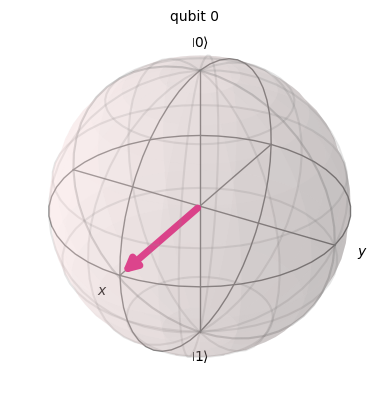

In [5]:
state = Statevector(qc)
plot_bloch_multivector(state)

Ahora vamos reiniciar el circuito. En esta oportunidad vamos a inicializar el qubit en estado $|0\rangle$ y aplicamos la compuerta **Hadamard** para ver que pasa con el vector. 

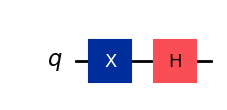

In [6]:
# Reiniciemos el circuito
qc = QuantumCircuit(1)
# Rotemos el qubit de |0> a |1> empleando una compuerta X
qc.x(0)
# Añadimos una compuerta H para rotar el qubit a un estado de superposición
qc.h(0)
# Dibujemos el circuito
qc.draw(output='mpl')

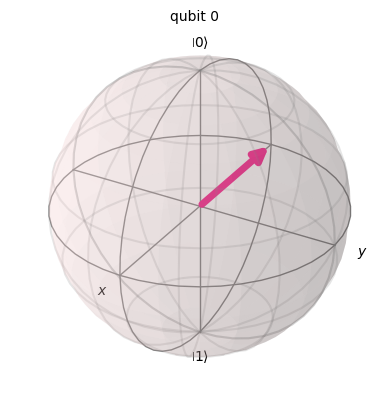

In [ ]:
state = Statevector(qc)
plot_bloch_multivector(state)

La diferencia es donde cae el vector en el eje $X$, dado que en este caso cae en la dirección opuesta cuando se aplica la compuerta Hadamard. Este sería el estado $|-\rangle$.

Note que los signos coinciden con la dirección de donde cae el vector luego de aplicar la compuerta de Hadamard. A partir de un estado $|0\rangle$, se mueve a la dirección positiva del eje $X$ y de un estado $|1\rangle$ se mueve al lado negativo de la dirección $X$.Esto denota la diferencia de fase de lso dos resultados, estas juegan un papel importante en muchos algoritmos cuánticos. Ahora que sabemos como se ve la superposición en un circuito y en la esfera de bloch, vamos a ejecutar  y ver las probabilidades cuando se mide un qbit luego de que lo hemos llevado a un estado de superposición. 

Vamos a medir el qbit luego de que esté en un estado de superposición y reiniciar el circuito. Iniciemos en $|0\rangle$ y apliquemos una compuerta de Hadamard. 

In [8]:
# Reiniciemos el circuito
# Tenemos un circuito de 1 qubit y 1 bit clásico
qc = QuantumCircuit(1,1)
# aplicamos una compuerta H
qc.h(0)

Ahora vamos a incluir un operador de medida.

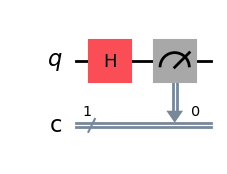

In [9]:
# registro cuántico a registro clásico
qreg_q = QuantumRegister(1, 'q')
creg_q = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qreg_q, creg_q)
qc.h(0)
qc.measure(qreg_q[0], creg_q[0])
qc.draw(output='mpl')

En las líneas anteriores hemos incluido una operación de medida al circuito. La operación de medida es una operación irreversible que colapsa el estado cuántico del sistema a un estado clásico. En este caso, el estado cuántico del qubit colapsará a un estado clásico de 0 o 1.

El diagrama ilustra nuestro circuito, donde podemos ver que ahora incluye dos nuevos componentes, el primero es el registro clásico, que se encuentra debajo del registro cuántico. El segundo componente es el operador de medida, el cuál extrae el resultado de pasar del qubit al bit clásico. El resultado colapsará al estado del qubit, bien sea 1 o 0.


In [10]:
# ejecutar el circuito en el simulador de Aer
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc, shots = 1000).result()
print(result.get_counts())

{'0': 511, '1': 489}


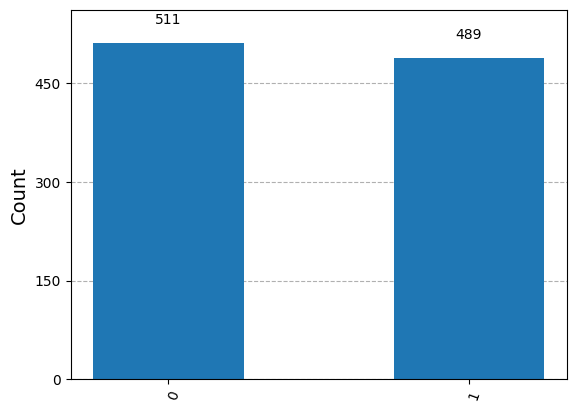

In [11]:
from qiskit.visualization import plot_histogram

counts = result.get_counts()
plot_histogram(counts)

La razón por la que ejecutamos tantas veces un circuito es porque los dispositivos cuánticos actuales no son tolerantes a fallos aún. Los dispositivos tolerantes a fallos son aquellos que presentan tasas de error muy bajas y altos volúmenes cuánticos. Los dispositivos cuánticos actuales necesitan ejecutar múltiples veces para proporcionar resultados probabilísticos confiables. Sin embargo, una vez que estos dispositivos alcancen un estado tolerante a fallos, se puede esperar que las probabilidades se acerquen más a 1; es decir, serán altamente precisos con menos ejecuciones.

Ahora que hemos cubierto la superposición, avanzaremos al segundo principio de la computación cuántica, que es el entrelazamiento.


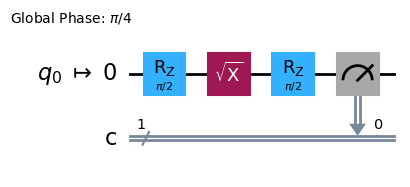

In [12]:
# Vamos a ejecutar el circuito en un dispositivo cuántico real

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

backend = service.least_busy(simulator=False, operational=True)
# Convervimos el circuito en un circuito de instrucciones de nivel de lenguaje intermedio
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
 
isa_circuit.draw("mpl", idle_wires=False)

In [21]:
from qiskit_ibm_runtime import Estimator

# Configurar el Estimator para ejecutar el circuito
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1  # Nivel de resiliencia contra ruido
estimator.options.default_shots = 1000  # Número de ejecuciones

# Como no hay observables específicos, usamos un observable por defecto (Z)
from qiskit.quantum_info import SparsePauliOp
observable = SparsePauliOp("Z")  # Observable Z para la medición
mapped_observable = observable.apply_layout(isa_circuit.layout)

# Ejecutar el circuito optimizado con el observable mapeado
job = estimator.run([(isa_circuit, [mapped_observable])])

# Recuperar los resultados
print(f">>> Job ID: {job.job_id()}")



>>> Job ID: cx730hjtpsjg008vj8v0


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='*****'
)
job = service.job('cx72zexpx23g008egfr0')
job_result = job.result()

for idx, pub_result in enumerate(job_result):
    print(f"Expectation values for pub {idx}: {pub_result.data.evs}")

Expectation values for pub 0: [0.]


Counts: {'0': 512, '1': 512}


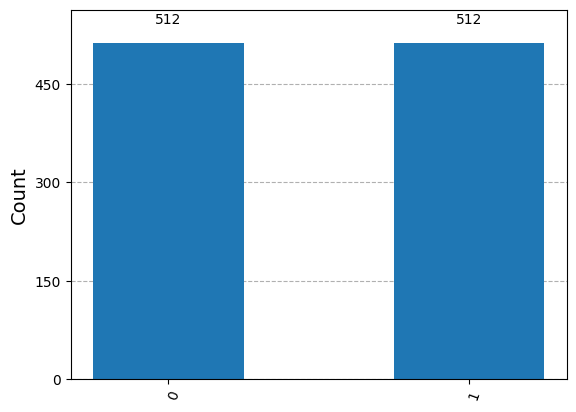

In [32]:
from qiskit.visualization import plot_histogram

# Recuperar los valores de expectativa
pub_result = job_result[0]
evs = pub_result.data.evs  # Valores de expectativa
shots = pub_result.metadata['shots']  # Número de shots

# Conversión de expectativa (para un observable Z)
prob_0 = (1 + evs[0]) / 2  # Probabilidad del estado |0>
prob_1 = 1 - prob_0        # Probabilidad del estado |1>

# Convertir probabilidades a conteos
counts = {
    '0': int(prob_0 * shots),
    '1': int(prob_1 * shots)
}

# Mostrar los conteos
print(f"Counts: {counts}")

# Visualizar el histograma
plot_histogram(counts)




# Comprendiendo el entrelazamiento

**Entrelazamiento** es probablemente uno de los principios más interesantes de los tres que fundamentan la computación cuántica. Esto se debe principalmente a que, hasta el día de hoy, sigue desconcertando a físicos y científicos, quienes adoptan diferentes posturas filosóficas al respecto. No te aburriré con los detalles, pero definitivamente te proporcionaré suficiente información para que entiendas qué es el entrelazamiento, aunque no cómo demostrarlo. Sí, suena confuso, pero créeme, el diablo está en los detalles y simplemente no hay suficiente espacio aquí para formular una respuesta completa sobre cómo funciona el entrelazamiento. ¡Pero basta de eso, pongámonos a trabajar!

El entrelazamiento cuántico, o simplemente entrelazamiento, se define como un fenómeno mecánico cuántico que ocurre cuando dos o más partículas tienen estados correlacionados. Esto, en esencia, significa que si tienes dos partículas o, para nuestros propósitos, cúbits que están entrelazados, entonces cuando medimos un cúbit, podemos determinar el resultado del otro cúbit basándonos en la medición del primero.

Como recordarás de nuestro ejemplo anterior, si colocamos un cúbit en superposición y lo medimos, tenemos un 50/50 de probabilidad de que colapse a uno de los dos estados, $ |0\rangle $ o $ |1\rangle $.

Ahora, si ese mismo cúbit estuviera entrelazado con otro cúbit y midiéramos uno de los cúbits, ese cúbit será $ |0\rangle $ o $ |1\rangle $. Sin embargo, si midiéramos el segundo cúbit, ya sea al mismo tiempo o en otro momento, también tendrá el mismo valor que el primer cúbit que medimos.

*Probablemente estés pensando, ¿cómo puede ser esto?* Si tomamos dos cúbits y los colocamos en superposición, y los medimos por separado, veremos correctamente que cada cúbit colapsará a un valor de $1$ o $0$. Sin embargo, cada vez que medimos los cúbits de manera individual, puede que no colapsen al mismo valor al mismo tiempo. Esto significa que si ejecutamos el experimento uno por uno, veríamos que, a veces, el primer cúbit mide $0$, mientras que el segundo cúbit podría medir $0$ o $1$.

Ambos están separados y no conocen el valor del otro antes, durante o después de la medición. Sin embargo, si entrelazáramos los dos cúbits y repitiéramos el mismo experimento, veríamos que los cúbits medirán exactamente los mismos valores cada vez.

*¿Imposible, dices?* Bueno, ¡es algo bueno para nosotros que ahora tengamos una computadora cuántica que podemos ejecutar para probar esto!

En el siguiente código, veremos que cuando los cúbits no están entrelazados, sus resultados son tales que no podemos inferir cuál sería el resultado de un cúbit basado en el resultado del otro cúbit. Dado que estamos midiendo dos cúbits, nuestros resultados se listarán como valores de 2 bits:

1. Primero vamos a crear un nuevo circuito con dos qubits, los que vamos a colocar en un estado de superposición y vamos a medirlos


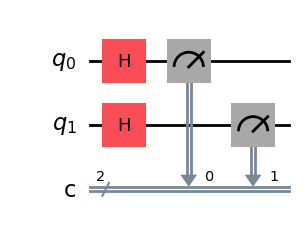

In [33]:
# Creamos un circuito de 2 qubits y 2 bits clásicos
qreg_q = QuantumRegister(2, 'q')
creg_q = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_q)
qc.h(0)
qc.h(1)
qc.measure([qreg_q[0],qreg_q[1] ], [creg_q[0],creg_q[1]])
qc.draw(output='mpl')

En el código anterior, creamos un circuito cuántico con dos cúbits, añadimos una puerta $ H $ a cada uno de los cúbits para colocarlos en un estado de superposición, y finalmente añadimos una medición de cada cúbit a su bit correspondiente.
El resultado del código anterior debería mostrar el siguiente circuito, donde podemos ver que cada cúbit tiene una puerta $ H $ que se mide en su registro de bits clásico correspondiente; es decir, el qubit 0 al bit 0 y el qubit 1 al bit 1.

2. Ahora vamos a ejecutar este nuevo circuito y vamos a mostrar estos resultados. 



{'00': 260, '10': 234, '01': 262, '11': 244}


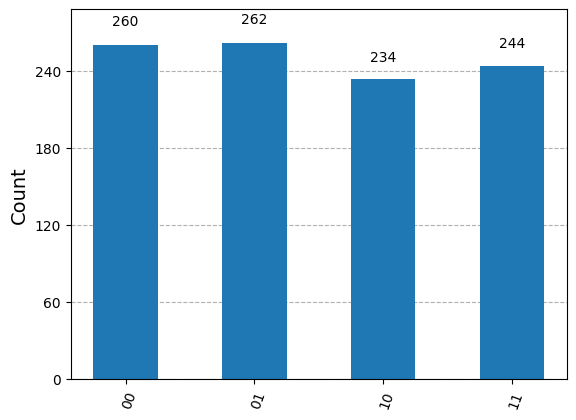

In [35]:
# ejecutar el circuito en el simulador de Aer
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc, shots = 1000).result()
print(result.get_counts())
counts = result.get_counts()
plot_histogram(counts)

En el código anterior, creamos el backend para ejecutarlo en el simulador con **1000 disparos** y representamos los resultados en un histograma para revisarlos.

> **Nota Importante**  
> Observa en los siguientes resultados que los resultados son muy aleatorios para cada qubit, lo cual era lo esperado. Algo que también me gustaría mencionar respecto a la notación es el orden de los qubits. Al escribirlos, el orden de los qubits es un poco diferente al orden de los bits. En la notación cuántica, el primer cúbit también se lista en el lado izquierdo, mientras que los cúbits subsiguientes se añaden hacia el lado derecho. En la notación binaria, sin embargo, el primer bit está en el lado derecho, mientras que los bits subsiguientes se añaden hacia el lado izquierdo.

Por ejemplo, si queremos representar el valor de 3 qubits correspondiente al número 5, lo haríamos utilizando $|101\rangle $, que es el mismo que la representación binaria del mismo número. Sin embargo, aquí el orden de los cúbits es diferente, ya que el primer cúbit se lista en la posición izquierda $(q[0])$, el segundo cúbit $(q[1])$ se lista en la posición del medio, y el último cúbit $(q[2])$ se lista en la posición derecha.

Por otro lado, en la notación de bits, el primer bit $(b[0])$ está en la posición derecha y se mueve hacia la izquierda en orden. Al medir, vinculamos los resultados del qubit al bit (como se muestra en la captura de pantalla anterior), lo que asigna correctamente los resultados de cada qubit a su posición binaria respectiva para que nuestros resultados estén en el orden de bits esperado.

En la gráfica cada qubit ha colapsado a un estado de $0$ o $1$, por lo que, al haber dos cúbits, deberíamos esperar ver los cuatro resultados aleatorios posibles, que son $00$, $01$, $10$ y $11$. Los resultados de probabilidad podrían variar ligeramente, pero, en general, deberían estar cerca del 25% de probabilidad para cada combinación.

3. Esto es lo esperado, así que vamos a entrelazar los dos cúbits y ver qué sucede. Para esto, entrelazaremos los dos cúbits y volveremos a ejecutar el experimento. Entrelacemos los dos cúbits añadiendo una puerta de múltiples cúbits llamada **Control-NOT (CNOT)**. Déjame explicar qué es esta puerta antes de incluirla en nuestro circuito. La puerta CNOT es una puerta de múltiples cúbits que opera sobre un cúbit basado en el valor de otro. Esto significa que la puerta de cúbit tiene dos puntos de conexión: uno llamado **Control** y otro llamado **Target**. El **Target** es generalmente algún operador, como una puerta **NOT (X)**, que cambiaría el estado del cúbit de $0$ a $1$ o viceversa. Sin embargo, el operador Target también puede ser casi cualquier operación, como una puerta $ H $, una puerta $ Y $ (que invierte 180° alrededor del eje Y), y así sucesivamente. Incluso podría ser otro Control.




La puerta CNOT actúa de tal manera que, cuando el cúbit atado al Control está en \(0\), el valor del cúbit Target no cambia, lo que significa que el operador Target no se habilitará. Sin embargo, si el valor del cúbit Control es \(1\), esto activará el operador Target. En este caso, la puerta CNOT habilitará una operación NOT en el cúbit Target, haciendo que invierta 180° alrededor del eje \(X\) desde su posición actual.

La siguiente tabla lógica representa las actualizaciones de los valores de Control y Target según el valor del Control para una puerta CNOT, así como los estados antes y después de la puerta CNOT:

<table>
    <thead>
        <tr>
            <th colspan="2">Antes de CNOT</th>
            <th colspan="2">Después de CNOT</th>
        </tr>
        <tr>
            <th>Control</th>
            <th>Target</th>
            <th>Control</th>
            <th>Target</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>|0⟩</td>
            <td>|0⟩</td>
            <td>|0⟩</td>
            <td>|0⟩</td>
        </tr>
        <tr>
            <td>|0⟩</td>
            <td>|1⟩</td>
            <td>|0⟩</td>
            <td>|1⟩</td>
        </tr>
        <tr>
            <td>|1⟩</td>
            <td>|0⟩</td>
            <td>|1⟩</td>
            <td>|1⟩</td>
        </tr>
        <tr>
            <td>|1⟩</td>
            <td>|1⟩</td>
            <td>|1⟩</td>
            <td>|0⟩</td>
        </tr>
    </tbody>
</table>




Ahora que podemos ver cómo funciona la puerta CNOT en dos cúbits, actualizaremos nuestro circuito para entrelazar los cúbits. En el siguiente código, crearemos un circuito con **2 cúbits**, donde aplicaremos una puerta Hadamard al primer cúbit y luego entrelazaremos el primer cúbit con el segundo utilizando una puerta CNOT:


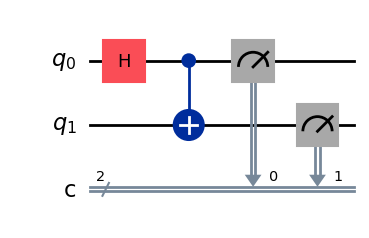

In [36]:
# Creamos un circuito de 2 qubits y 2 bits clásicos
qreg_q = QuantumRegister(2, 'q')
creg_q = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_q)
# Aplicamos una compuerta H al primer qubit
qc.h(0)
# Añadimos una compuerta CNOT al segundo qubit controlado por el primer qubit
qc.cx(0, 1)
# Medimos ambos qubits en el bit clasico correspondiente
qc.measure([qreg_q[0],qreg_q[1] ], [creg_q[0],creg_q[1]])
qc.draw(output='mpl')

4. Ejecutar el experimento y graficar los resultados: Ahora, ejecutaremos el experimento y representaremos los resultados. Esto es similar a los experimentos anteriores que realizamos, donde ejecutaremos el circuito, extraeremos las cuentas de los resultados y los representaremos en un histograma para visualizar los resultados:


{'00': 507, '11': 493}


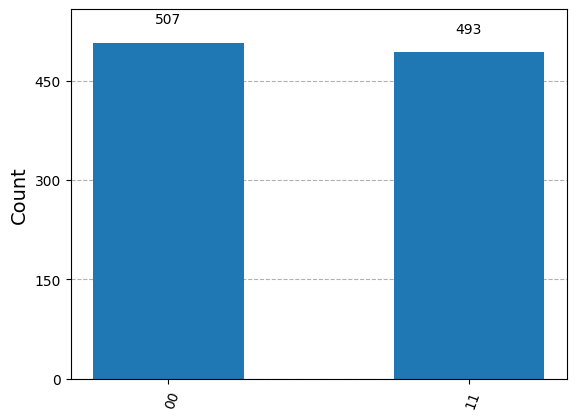

In [37]:
# ejecutar el circuito en el simulador de Aer
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc, shots = 1000).result()
print(result.get_counts())
counts = result.get_counts()
plot_histogram(counts)

Vamos a repetir lo anterior en el computador cuántico

Usando el backend: ibm_brisbane


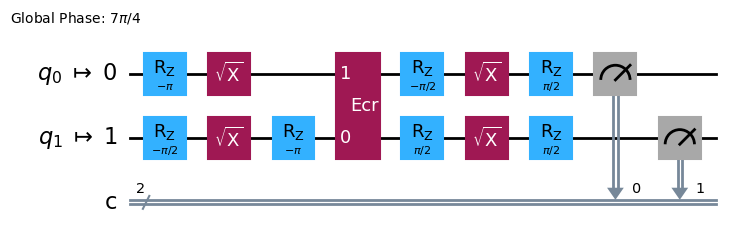

In [78]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import SetLayout, FullAncillaAllocation, ApplyLayout
from qiskit.transpiler.layout import Layout
from qiskit.quantum_info import SparsePauliOp


# Crear el circuito de 2 qubits
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Aplicar compuertas
circuit.h(0)  # Compuerta Hadamard al primer qubit
circuit.cx(0, 1)  # CNOT: el primer qubit controla al segundo
circuit.measure_all()  # Medir ambos qubits

# Dibujar el circuito
circuit.draw("mpl", idle_wires=False)

# Configurar IBM Quantum y el backend
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
print(f"Usando el backend: {backend.name}")

# Transpilar el circuito manualmente con el PassManager
# Transpilar el circuito para el backend real
tcircuit = transpile(qc, backend=backend, optimization_level=1)

tcircuit.draw("mpl", idle_wires=False)


In [79]:

job = backend.run(tcircuit, shots=1000)
# Recuperar los resultados
print(f">>> Job ID: {job.job_id()}")



/tmp/ipykernel_38822/489446373.py:1: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(tcircuit, shots=1000)


>>> Job ID: cx7sq34ztp30008fsxag


In [80]:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
qreg q[127];
creg c[2];
rz(-pi) q[0];
sx q[0];
rz(-pi/2) q[1];
sx q[1];
rz(-pi) q[1];
ecr q[1],q[0];
rz(-pi/2) q[0];
sx q[0];
rz(pi/2) q[0];
rz(pi/2) q[1];
sx q[1];
rz(pi/2) q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

{'00': 503, '11': 497}


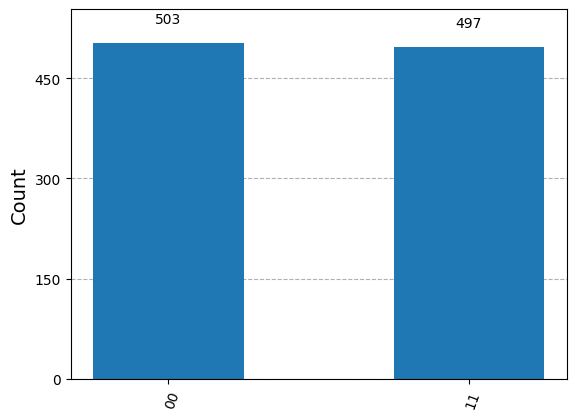

In [84]:
# ejecutar el circuito en el simulador de Aer
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc, shots = 1000).result()
print(result.get_counts())
counts = result.get_counts()
plot_histogram(counts)